In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


[2019-12-14 15:29:32,986] INFO in core: Started 


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
S&P 500,45.0,0.169856,0.166491,-0.243486,0.088755,0.184474,0.258286,0.706355,0.972536,7.803635,1.879683,0.117017
Alibaba,45.0,0.441211,0.625270,-0.830919,-0.014120,0.447441,0.808921,1.966693,0.692939,20.294709,4.937187,0.252815
CSI 300,45.0,0.087822,0.415031,-0.580704,-0.221208,0.042742,0.331674,1.004699,0.192481,5.598528,6.031529,0.367454
M1,45.0,0.027305,0.254321,-0.672497,-0.106662,0.081671,0.171890,0.519257,0.076156,0.824763,3.413828,-0.628585


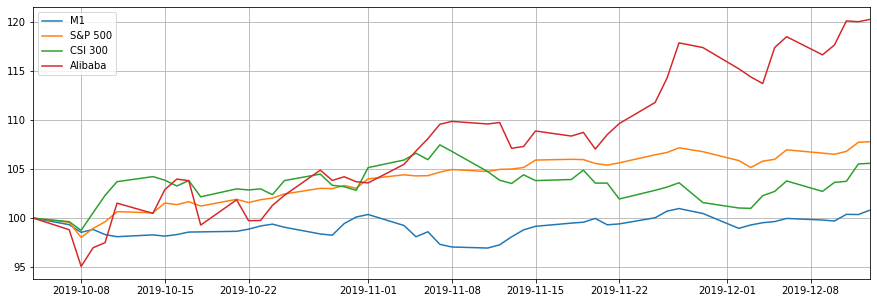

In [6]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 50)})
    # ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 50)})
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    # 'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

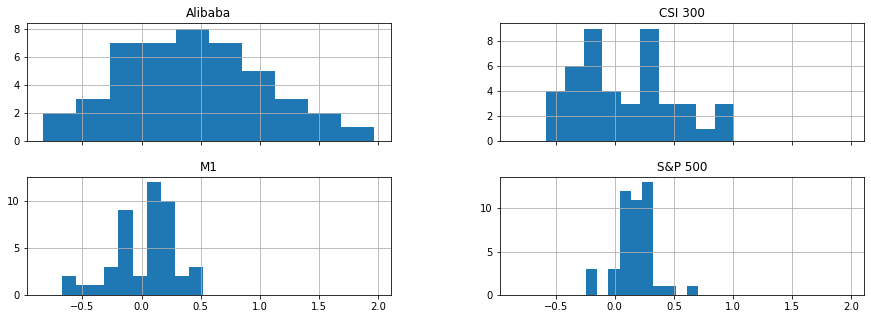

In [7]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(2, 2))